In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix

In [11]:
dados = pd.read_csv(r'C:\Projetos Data Science\Detecção de Fraude no Cartão de Crédito\Dados\creditcard.csv')

In [12]:
# <-- ANÁLISE EXPLOCRATÓRIA DOS DADOS
# -> nº de Operações Fraudulentas e Normais
n_normais = len(dados[dados.Class == 0])
n_fraudes = len(dados[dados.Class == 1])
print('Nº de Operações Normais:', n_normais)
print('Nº de Operações Fraudulentas:', n_fraudes)

Nº de Operações Normais: 284315
Nº de Operações Fraudulentas: 492


In [13]:
# <-- REAMOSTRAGEM DOS DADOS
# -> Estratificação da Amostra
operacoes_normais = np.array(np.random.choice(dados[dados.Class == 0].index, n_fraudes, replace=False))
operacoes_fraudulentas = np.array(dados[dados.Class == 1].index)
amostra_indice = np.concatenate([operacoes_normais, operacoes_fraudulentas])
amostra = dados.iloc[amostra_indice, :]

In [14]:
# <-- SEPARAÇÂO DOS DADOS (AMOSTRA)
previsores_amostra = amostra.loc[:, amostra.columns != 'Class'].values
classe_amostra = amostra.loc[:, amostra.columns == 'Class'].values

In [15]:
# <-- DIVIDINDO OS DADOS EM TREINO E TESTE (AMOSTRA)(70%/30%)
X_treinamento_amostra, X_teste_amostra, y_treinamento_amostra, y_teste_amostra = train_test_split(previsores_amostra,
                                                                                                    classe_amostra,
                                                                                                    test_size=0.30,
                                                                                                    random_state=0)
X_teste_amostra   

array([[ 1.35760000e+05, -1.25738039e+00,  1.48426998e-01, ...,
         6.79079297e-02,  4.79275556e-03,  1.80000000e+01],
       [ 1.20930000e+04, -4.69679522e+00,  2.69386748e+00, ...,
        -1.50845793e+00,  6.08074683e-01,  0.00000000e+00],
       [ 1.58688000e+05, -4.10966579e-01,  6.15790834e-01, ...,
         1.74258515e-01,  1.75313703e-01,  1.49500000e+01],
       ...,
       [ 1.49096000e+05,  1.18489112e+00,  3.15208421e+00, ...,
         4.85186935e-01,  3.26551572e-01,  0.00000000e+00],
       [ 1.46022000e+05,  9.08636658e-01,  2.84902401e+00, ...,
         6.48704799e-01,  3.60224330e-01,  1.18000000e+00],
       [ 7.51900000e+03,  1.23423505e+00,  3.01974042e+00, ...,
        -1.00162235e-02,  1.46792735e-01,  1.00000000e+00]])

In [16]:
# <-- CRIAÇÃO DO MODELO
florest = RandomForestClassifier(n_estimators= 1000)
florest.fit(X_treinamento_amostra, y_treinamento_amostra)

C:\Users\Pedro Francisco\AppData\Local\Temp\ipykernel_25644\1173129095.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  florest.fit(X_treinamento_amostra, y_treinamento_amostra)


RandomForestClassifier(n_estimators=1000)

In [17]:
florest.estimators_[1]

DecisionTreeClassifier(max_features='sqrt', random_state=563471343)

In [18]:
# <-- PREVISÕES ATRAVÉS DOS DADOS TESTES
previsao = florest.predict(X_teste_amostra)
previsao

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [19]:
# <-- TAXA DE ACERTO DO MODELO
taxa_acerto = accuracy_score(y_teste_amostra, previsao)
taxa_erro = 1 - taxa_acerto
taxa_acerto

0.9358108108108109

c:\Projetos Data Science\venv\lib\site-packages\yellowbrick\base.py:390: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y, **kwargs)


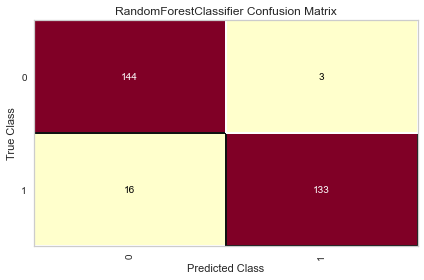

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [21]:
# VISUALIZAÇÃO DA MATRIX DE CONFUSÃO
v = ConfusionMatrix(RandomForestClassifier())
v.fit(X_treinamento_amostra, y_treinamento_amostra)
v.score(X_teste_amostra, y_teste_amostra)
v.poof()